# I. Import libraries and load dataset 

In [41]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [42]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# fetch dataset 
metro_interstate_traffic_volume = fetch_ucirepo(id=492) 
  
# data (as pandas dataframes) 
X = metro_interstate_traffic_volume.data.features 
y = metro_interstate_traffic_volume.data.targets   

# II. Sanity check

In [44]:
X.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00


In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [46]:
X.describe()

,temp,rain_1h,snow_1h,clouds_all
count,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231
std,13.338232,44.789133,0.008168,39.015750
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000
50%,282.450000,0.000000,0.000000,64.000000
75%,291.806000,0.000000,0.000000,90.000000
max,310.070000,9831.300000,0.510000,100.000000


temp: kelvin

rain_1h: mm

snow_1h: mm

clouds_all: %

In [47]:
y.head()

,traffic_volume
0,5545
1,4516
2,4767
3,5026
4,4918


In [48]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   traffic_volume  48204 non-null  int64
dtypes: int64(1)
memory usage: 376.7 KB


In [49]:
y.describe()

,traffic_volume
count,48204.000000
mean,3259.818355
std,1986.860670
min,0.000000
25%,1193.000000
50%,3380.000000
75%,4933.000000
max,7280.000000


## 1. cleaning temp and rain_1h 

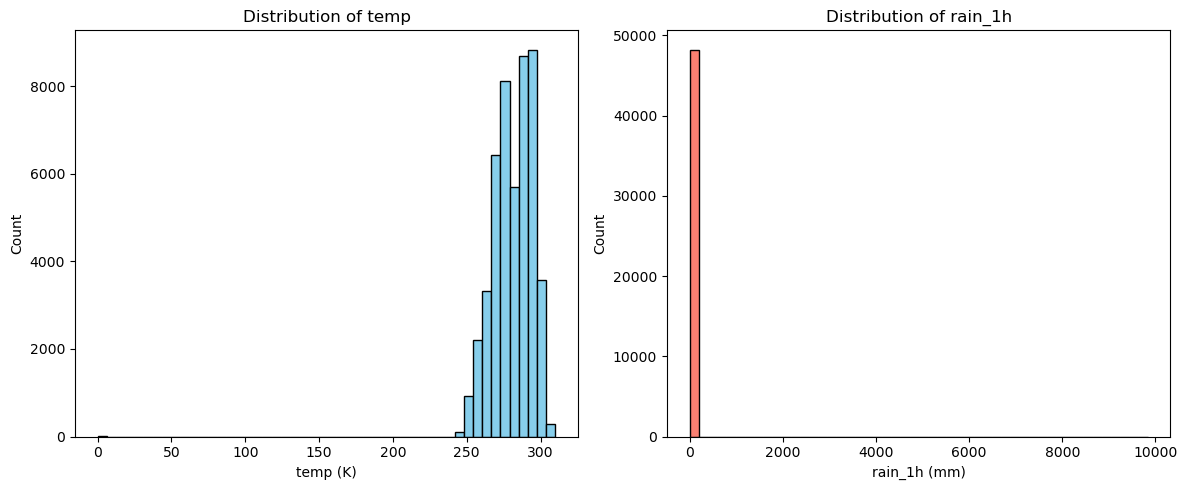

In [50]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(X['temp'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of temp')
plt.xlabel('temp (K)')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.hist(X['rain_1h'], bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of rain_1h')
plt.xlabel('rain_1h (mm)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

temp 

In [51]:
X[X['temp'] == 0].count()

holiday                 0
temp                   10
rain_1h                10
snow_1h                10
clouds_all             10
weather_main           10
weather_description    10
date_time              10
dtype: int64

In [52]:
# temp
min_temp_gt0 = X.loc[X['temp'] > 0, 'temp'].min()
print("Giá trị temp nhỏ nhất > 0:", min_temp_gt0)

Giá trị temp nhỏ nhất > 0: 243.39


In [53]:
a = X[X['snow_1h'] > 0]
a['temp'].min()

266.73

không hẳn là cứ nhiệt độ âm (dưới $0^\circ\text{C}$) là sẽ có tuyết, mà còn phụ thuộc vào độ ẩm không khí. Nhưng chắc chắn temp = 0 là lỗi 

In [54]:
X[X['temp'] == 0]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
11898,NaN,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 03:00:00
11899,NaN,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 04:00:00
11900,NaN,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 05:00:00
11901,NaN,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 06:00:00
11946,NaN,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 03:00:00
11947,NaN,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 04:00:00
11948,NaN,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 05:00:00
11949,NaN,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 06:00:00
11950,NaN,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 07:00:00
11951,NaN,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 08:00:00


In [ ]:
# temp: replace 0 with median
median_temp = X.loc[X['temp'] > 0, 'temp'].median()
X['temp'] = X['temp'].replace(0, median_temp)

C:\Users\PC\AppData\Local\Temp\ipykernel_12036\751021062.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['temp'] = X['temp'].replace(0, median_temp)


rain 

In [56]:
a = X[X['rain_1h'] < 9831.3] 
a['rain_1h'].max()

55.63

In [57]:
X[X['rain_1h']  == 9831.3] 

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
24872,NaN,302.11,9831.3,0.0,75,Rain,very heavy rain,2016-07-11 17:00:00


lượng mưa trong 1 giờ lớn nhất trong thế giới được ghi nhận là 401 mm, nên 9831.3 chắc chắn không hợp lệ 

In [58]:
# rain_1h: replace extreme >100 with median
median_rain = X.loc[X['rain_1h'] < 100, 'rain_1h'].median()
X.loc[X['rain_1h'] > 100, 'rain_1h'] = median_rain

# III. Feature engineering

# 1. holiday

In [59]:
X['holiday'].unique()

array([nan, 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [ ]:
df = X.copy()

df["is_holiday"] = df["holiday"].notna().astype(int)
df = df.drop(columns=["holiday"])

## 2. date_time

In [61]:
# Convert datetime
df["date_time"] = pd.to_datetime(df["date_time"])

In [62]:
start = df["date_time"].min()
end = df["date_time"].max()
print(start, end)

2012-10-02 09:00:00 2018-09-30 23:00:00


In [63]:
start = df["date_time"].min()
end = df["date_time"].max()
print(start, end)

2012-10-02 09:00:00 2018-09-30 23:00:00


In [64]:
total_hours = int((end - start) / pd.Timedelta(hours=1)) + 1
print("Số giờ liên tục dự kiến:", total_hours)

Số giờ liên tục dự kiến: 52551


In [65]:
print("Số bản ghi trong dataset:", len(X))

Số bản ghi trong dataset: 48204


In [ ]:
# FEATURE TIME + CYCLICAL ENCODING
df["year"] = df["date_time"].dt.year
df["month"] = df["date_time"].dt.month
df["day"] = df["date_time"].dt.day
df["hour"] = df["date_time"].dt.hour
df["day_of_week"] = df["date_time"].dt.dayofweek

# is_weekend 
df["is_weekend"] = (df["day_of_week"] >= 5).astype(int)

# Weather binary flags
df["is_rain"] = (df["rain_1h"] > 0).astype(int)
df["is_snow"] = (df["snow_1h"] > 0).astype(int)

# Cyclical
df["hour_sin"] = np.sin(2 * np.pi * df["hour"] / 24)
df["hour_cos"] = np.cos(2 * np.pi * df["hour"] / 24)
df["dow_sin"] = np.sin(2 * np.pi * df["day_of_week"] / 7)
df["dow_cos"] = np.cos(2 * np.pi * df["day_of_week"] / 7)
df["month_sin"] = np.sin(2 * np.pi * df["month"] / 12)
df["month_cos"] = np.cos(2 * np.pi * df["month"] / 12)

# Fourier Annual Seasonality
df["fourier_sin"] = np.sin(2 * np.pi * np.arange(len(df)) / (365*24))
df["fourier_cos"] = np.cos(2 * np.pi * np.arange(len(df)) / (365*24))

# Trend Index 
df["trend"] = np.arange(len(df))

## 3. weather_main and weather_description

In [67]:
X['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [68]:
X['weather_description'].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

tính mean traffic volume cho từng mô tả dựa trên dataset và gán score theo đó 

In [ ]:
# TARGET MEAN ENCODING (train only)
train_mask = df["date_time"] < "2018-01-01"

train_full = df.loc[train_mask].copy()
train_full["traffic_volume"] = y[train_mask].values

# Trong TEST có thể xuất hiện mô tả thời tiết chưa từng xuất hiện trong TRAIN => gán giá trị traffic trung bình của toàn bộ TRAIN
global_mean = train_full["traffic_volume"].mean()
weather_score = (
    train_full.groupby("weather_description")["traffic_volume"].mean().to_dict()
)

df["weather_score"] = df["weather_description"].apply(
    lambda x: weather_score[x] if x in weather_score else global_mean
)

# Drop raw text weather columns
df = df.drop(columns=["weather_description", "weather_main"])

In [ ]:
# DROP date_time
df = df.drop(columns=["date_time"])

In [ ]:
# TẠO LAG VÀ ROLLING TRÊN FULL DATA
full_X = df.copy()
full_y = y.copy()

full_X["lag1"] = full_y.shift(1)
full_X["lag24"] = full_y.shift(24)
full_X["lag168"] = full_y.shift(168)

full_X["roll3"] = full_y.shift(1).rolling(3).mean()
full_X["roll24"] = full_y.shift(1).rolling(24).mean()
full_X["roll_std24"] = full_y.shift(1).rolling(24).std()

# lag weather features 
for col in ["temp", "rain_1h", "snow_1h", "clouds_all"]:
    full_X[f"{col}_lag1"] = full_X[col].shift(1)
    
# Drop NaN do lag tạo ra
full_X = full_X.dropna().reset_index(drop=True)
full_y = full_y.loc[full_X.index].reset_index(drop=True)

In [ ]:
# SPLIT lại TRAIN/TEST sau lag
train_mask_final = full_X["year"] < 2018
test_mask_final  = full_X["year"] >= 2018

X_train = full_X[train_mask_final].copy()
X_test  = full_X[test_mask_final].copy()
y_train = full_y[train_mask_final].copy()
y_test  = full_y[test_mask_final].copy()

kiểm tra lại các cột sau biến đổi

In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40087 entries, 0 to 40086
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp             40087 non-null  float64
 1   rain_1h          40087 non-null  float64
 2   snow_1h          40087 non-null  float64
 3   clouds_all       40087 non-null  int64  
 4   is_holiday       40087 non-null  int64  
 5   year             40087 non-null  int32  
 6   month            40087 non-null  int32  
 7   day              40087 non-null  int32  
 8   hour             40087 non-null  int32  
 9   day_of_week      40087 non-null  int32  
 10  is_weekend       40087 non-null  int64  
 11  is_rain          40087 non-null  int64  
 12  is_snow          40087 non-null  int64  
 13  hour_sin         40087 non-null  float64
 14  hour_cos         40087 non-null  float64
 15  dow_sin          40087 non-null  float64
 16  dow_cos          40087 non-null  float64
 17  month_sin        

In [74]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7949 entries, 40087 to 48035
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp             7949 non-null   float64
 1   rain_1h          7949 non-null   float64
 2   snow_1h          7949 non-null   float64
 3   clouds_all       7949 non-null   int64  
 4   is_holiday       7949 non-null   int64  
 5   year             7949 non-null   int32  
 6   month            7949 non-null   int32  
 7   day              7949 non-null   int32  
 8   hour             7949 non-null   int32  
 9   day_of_week      7949 non-null   int32  
 10  is_weekend       7949 non-null   int64  
 11  is_rain          7949 non-null   int64  
 12  is_snow          7949 non-null   int64  
 13  hour_sin         7949 non-null   float64
 14  hour_cos         7949 non-null   float64
 15  dow_sin          7949 non-null   float64
 16  dow_cos          7949 non-null   float64
 17  month_sin     

In [75]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40087 entries, 0 to 40086
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   traffic_volume  40087 non-null  int64
dtypes: int64(1)
memory usage: 626.4 KB


In [76]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7949 entries, 40087 to 48035
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   traffic_volume  7949 non-null   int64
dtypes: int64(1)
memory usage: 124.2 KB


In [77]:
print(X_train.iloc[0,:])

temp                288.860000
rain_1h               0.000000
snow_1h               0.000000
clouds_all           75.000000
is_holiday            0.000000
year               2012.000000
month                10.000000
day                   9.000000
hour                 19.000000
day_of_week           1.000000
is_weekend            0.000000
is_rain               0.000000
is_snow               0.000000
hour_sin             -0.965926
hour_cos              0.258819
dow_sin               0.781831
dow_cos               0.623490
month_sin            -0.866025
month_cos             0.500000
fourier_sin           0.120208
fourier_cos           0.992749
t                   168.000000
weather_score      3580.474695
lag1               4460.000000
lag24              4259.000000
lag168             5545.000000
roll3              5645.333333
roll24             3728.250000
roll_std24         2152.352409
temp_lag1           290.130000
rain_1h_lag1          0.000000
snow_1h_lag1          0.000000
clouds_a

## 4. Scaling

In [ ]:
# 7. SCALING
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

# IV. Creating sequence

In [ ]:
# CREATE SEQUENCES 
def make_sequences(X, y, window=24):
    Xs, ys = [], []
    for i in range(window, len(X)):
        Xs.append(X[i-window:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

In [80]:
WINDOW = 24  # 24 giờ

X_train_seq, y_train_seq = make_sequences(X_train, y_train.values, WINDOW)
X_test_seq,  y_test_seq  = make_sequences(X_test,  y_test.values, WINDOW)

X_train_seq.shape, X_test_seq.shape

((40063, 24, 33), (7925, 24, 33))

# V. Exporting

In [81]:
np.save("X_train_seq.npy", X_train_seq)
np.save("y_train_seq.npy", y_train_seq)
np.save("X_test_seq.npy", X_test_seq)
np.save("y_test_seq.npy", y_test_seq)